In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import folium
%matplotlib notebook
token = "pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2s4a285NTM1MDQwbDNocHozdXlkNzIyaSJ9.-_8gh9gG4VuprIPnmXBr3A" # your mapbox token
tileurl = 'https://api.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}@2x.png?access_token=' + str(token)

# import get_canadian_weather_observations.py

Index(['Name', 'Province', 'Climate ID', 'Station ID', 'WMO ID', 'TC ID',
       'Latitude (Decimal Degrees)', 'Longitude (Decimal Degrees)', 'Latitude',
       'Longitude', 'Elevation (m)', 'First Year', 'Last Year',
       'HLY First Year', 'HLY Last Year', 'DLY First Year', 'DLY Last Year',
       'MLY First Year', 'MLY Last Year', 'Record Length'],
      dtype='object')
1410
count    1410.000000
mean       27.944681
std        23.338404
min         6.000000
25%        11.000000
50%        22.000000
75%        33.000000
max       177.000000
Name: Record Length, dtype: float64


/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<IPython.core.display.Javascript object>


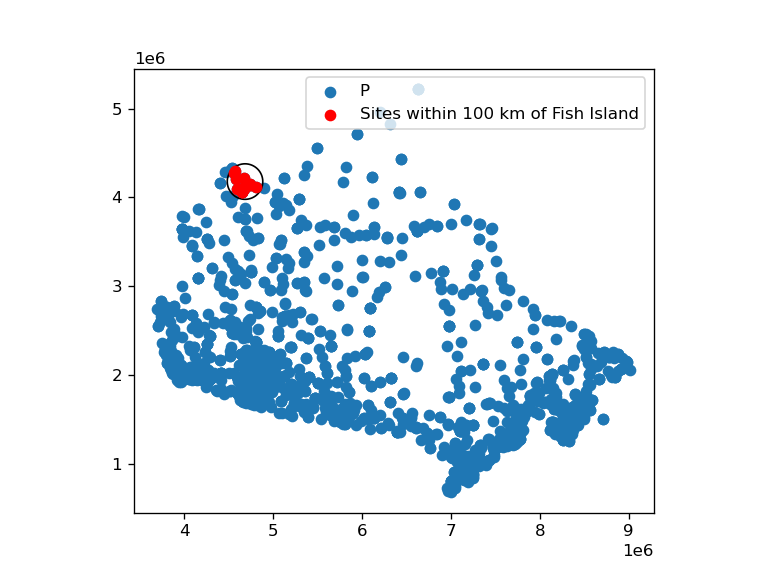

In [2]:
df = pd.read_csv('station_list/Station Inventory EN.csv',skiprows=3)
# print(df.columns)
df['Record Length'] = df['Last Year']-df['First Year']
# df = df.loc[((df['Latitude (Decimal Degrees)']>68)&(df['Longitude (Decimal Degrees)']<-125))] 
# # df = df.loc[((df['First Year']<=1990)&(df['Last Year']>=2019))] 
# df = df.loc[((df['Province']=='NORTHWEST TERRITORIES')|(df['Province']=='YUKON TERRITORY'))] 
df = df.loc[(df['Record Length']>5)] 
df = df.loc[np.isnan(df['HLY First Year'])==False] 
# HLY First Year
print(df.columns)
print(df['Name'].count())
print(df['Record Length'].describe())


Query = pd.DataFrame(data={'Site':['Fish Island'],'Longitude (Decimal Degrees)':[-134.857734],
                          'Latitude (Decimal Degrees)':[69.386080]})

gdfQuery = gpd.GeoSeries(index=Query['Site'].values,
        data=gpd.points_from_xy(Query['Longitude (Decimal Degrees)'],
                                Query['Latitude (Decimal Degrees)']
                               )
                                  )
gdf = gpd.GeoDataFrame(df,
    geometry=gpd.points_from_xy(df['Longitude (Decimal Degrees)'],
                                df['Latitude (Decimal Degrees)']
                               )
                                  )
# Now we can assign a CRS
WGS_1984={'init' :'epsg:4326'}
gdfQuery.crs = WGS_1984
gdf.crs = WGS_1984

gdf = gdf.to_crs({'init': 'epsg:3347'})
gdfQuery = gdfQuery.to_crs({'init': 'epsg:3347'})

fig,ax=plt.subplots()
gdf.plot(ax=ax,label='P',legend=True)
Dist = 2e5
gdfQuery = gdfQuery.buffer(Dist)
gdfQuery.plot(ax=ax,label='Q',edgecolor='k',color=[0,0,0,0])


In = gdf.assign(**{key: gdf.within(geom) for key, geom in gdfQuery.items()})
# print(In)
In = In.loc[In['Fish Island']==True]
In.plot(color='r',ax=ax,legend=True,label='Sites within 100 km of Fish Island')

ax.legend()


In [49]:



# print(df.head())
Map = folium.Map(
    location=[69.386080,-134.857734], zoom_start=4, tiles=tileurl, attr='Mapbox')

point=folium.CircleMarker(
        location=[69.386080,-134.857734],
        radius=10,
        popup='Fish Island',
        fill_opacity = 1,
        fill=True,
        color='black',
        line_weight=.35,
        fill_color='green'
).add_to(Map)

for i,row in In.iterrows():
    point=folium.CircleMarker(
            location=[row['Latitude (Decimal Degrees)'],row['Longitude (Decimal Degrees)']],
            radius=5,
            popup=row['Name']+'\n'+str(row['Record Length']) +' '+str(row['First Year'])+' '+str(row['Last Year'])+\
        ' '+str(row['Station ID']),
            fill_opacity = 1,
            fill=True,
            color='black',
            line_weight=.35,
            fill_color='blue'
    ).add_to(Map)
Map

In [5]:
ID = In['Station ID']
! pip install progress
# for I in ID:
# print()
for I in ID:
#     print(I)
    ! python get_canadian_weather_observations.py --daily -o /home/jupyter/Data {I}

Directory does not exists 
	/home/jupyter/Data/1560/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/1596/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/1602/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/1623/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/1669/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/31470/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/41883/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/10091/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/1699/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/1700/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/26987/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/10823/daily
	Creating directory
Directory does not exists 
	/home/jupyter/Data/10824/daily


In [7]:

d='/home/jupyter/Data/'
Time='daily'
# p = 0
Data = {}
for j,row in In.iterrows():
#     if i == 0:
#         Temp = pd.read_csv('/'+file,index_col='Date/Time',parse_dates=True)
#     else:
#         Temp = Temp.append(pd.read_csv(Dir+'/'+file,index_col='Date/Time',parse_dates=True))




# Dir='/home/jupyter/Data/27620/hourly'
    Dir = d+str(row['Station ID'])+'/'+Time

    for i,file in enumerate(os.listdir(Dir)):
        if i == 0:
            Temp = pd.read_csv(Dir+'/'+file,index_col='Date/Time',parse_dates=True)
        else:
    #         Temp2 = pd.read_csv(Dir+'/'+file)
            Temp = Temp.append(pd.read_csv(Dir+'/'+file,index_col='Date/Time',parse_dates=True))
    Data[row['Station ID']]=Temp

In [55]:
print(In['Name'])
# plt.figure(figsize=(10,8))
# Set = ['INUVIK']
# for S in Set:
    
#     Temp = In[In['Name'].str.contains(S)]
#     for I in Temp['Station ID']:
#         Rec = Data[I]
#         L=Rec['Station Name'].unique()
#         print(Rec.count()['Station Name'])
#         Yrly = Rec.resample('Y').mean()
#         Yrly['Pct'] = Rec.resample('Y').count()['Mean Temp (°C)']/365

#         Yrly = Yrly.loc[Yrly['Pct']>.9,'Mean Temp (°C)']
#         plt.plot(Yrly.index,Yrly.values,marker='*',label=L)
    
# plt.legend()

1825    HERSCHEL ISLAND
1876    SHINGLE POINT A
1887       STOKES POINT
1916          AKLAVIK A
1995           INUVIK A
1997      INUVIK AWOS A
1998     INUVIK CLIMATE
2024       PELLY ISLAND
2046        TUKTOYAKTUK
2048      TUKTOYAKTUK A
2050        TUKTOYAKTUK
2067      LIVERPOOL BAY
2077        STORM HILLS
2081       TRAIL VALLEY
Name: Name, dtype: object


In [9]:

    print(Temp.columns)

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year',
       'Month', 'Day', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag',
       'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag',
       'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)',
       'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag',
       'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)',
       'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')
